In [4]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv("modified_student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,name,email,password,attendance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,Varsha,varsha@gmail.com,varsha6106,64
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,6,6,7,Varsha,varsha@gmail.com,varsha8052,92
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,6,7,9,Mary,mary@gmail.com,mary8790,53
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,16,15,16,Mary,mary@gmail.com,mary1453,96
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,7,11,11,Khushi,khushi@gmail.com,khushi4126,95


In [6]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,name,email,password,attendance
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,Ansh,ansh@gmail.com,ansh9438,87
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,Ram,ram@gmail.com,ram7188,87
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,11,9,8,Ram,ram@gmail.com,ram1477,93
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,Piyush,piyush@gmail.com,piyush9710,61
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,5,5,8,9,9,Karan,karan@gmail.com,karan3025,64


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'name', 'email',
       'password', 'attendance'],
      dtype='object')

1. school: The student's school (binary):

- "GP" = Gabriel Pereira
- "MS" = Mousinho da Silveira

2. sex: The student's gender (binary):

- "F" = Female
- "M" = Male

3. age: The student's age (numeric).

4. address: The student's home address type (binary):

- "U" = Urban
- "R" = Rural

5. famsize: Family size (binary):

- "LE3" = Less than or equal to 3 members
- "GT3" = Greater than 3 members

6. Pstatus: Parent's cohabitation status (binary):

- "T" = Living together
- "A" = Apart
7. Medu: Mother's education level (numeric):

- 0 = None
- 1 = Primary education (4th grade)
- 2 = 5th to 9th grade
- 3 = Secondary education
- 4 = Higher education

8. Fedu: Father's education level (numeric), same scale as Medu.

9. Mjob: Mother's job (categorical):

- "teacher" = Teacher
- "health" = Health care related
- "services" = Civil services (e.g. administrative or police)
- "at_home" = At home
- "other" = Other

10. Fjob: Father's job (categorical), same categories as Mjob.

11. reason: Reason to choose this school (categorical):

- "home" = Close to home
- "reputation" = School's reputation
- "course" = Preference for the course
- "other" = Other reasons

12. guardian: Student's guardian (categorical):

- "mother" = Mother
- "father" = Father
- "other" = Other

13. traveltime: Home to school travel time (numeric):

- 1 = <15 minutes
- 2 = 15 to 30 minutes
- 3 = 30 minutes to 1 hour
- 4 = >1 hour

14. studytime: Weekly study time (numeric):

- 1 = <2 hours
- 2 = 2 to 5 hours
- 3 = 5 to 10 hours
4 = >10 hours

15. failures: Number of past class failures (numeric).

16. schoolsup: Extra educational support (binary):

- "yes" = Yes
- "no" = No
17. famsup: Family educational support (binary):

- "yes" = Yes
- "no" = No

18. paid: Extra paid classes within the course subject (binary):

- "yes" = Yes
- "no" = No

19. activities: Extracurricular activities (binary):

- "yes" = Yes
- "no" = No

20. nursery: Attended nursery school (binary):

- "yes" = Yes
- "no" = No

21. higher: Wants to take higher education (binary):

- "yes" = Yes
- "no" = No

22. internet: Internet access at home (binary):

- "yes" = Yes
- "no" = No

23. romantic: In a romantic relationship (binary):

- "yes" = Yes
- "no" = No

24. famrel: Quality of family relationships (numeric, from 1 - very bad to 5 - excellent).

25. freetime: Free time after school (numeric, from 1 - very low to 5 - very high).

26. goout: Going out with friends (numeric, from 1 - very low to 5 - very high).

27. Dalc: Workday alcohol consumption (numeric, from 1 - very low to 5 - very high).

28. Walc: Weekend alcohol consumption (numeric, from 1 - very low to 5 - very high).

29. health: Current health status (numeric, from 1 - very bad to 5 - very good).

30. absences: Number of school absences (numeric).

31. G1: First period grade (numeric, from 0 to 20).

32. G2: Second period grade (numeric, from 0 to 20).

33. G3: Final grade (numeric, from 0 to 20).

# Data Cleaning

In [8]:
pd.isnull(df).sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
name          0
email         0
password      0
attendance    0
dtype: int64

##### No null value is present in data 

# EDA

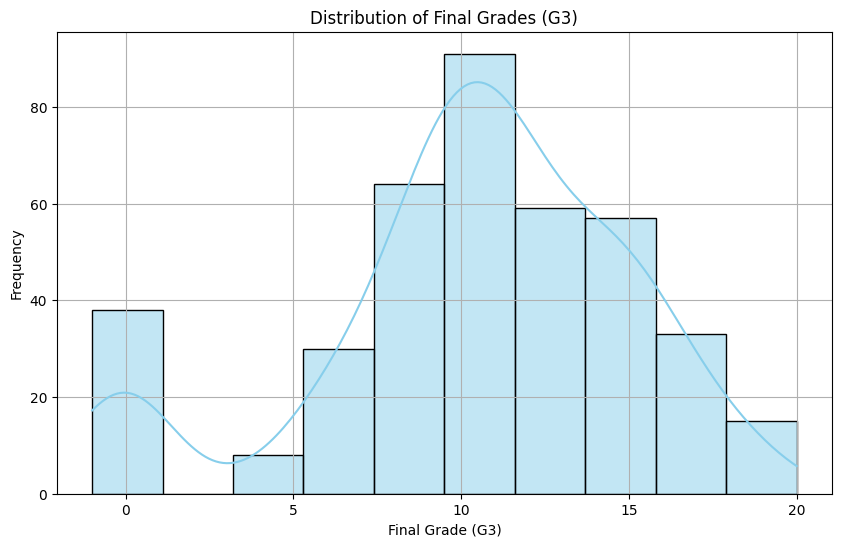

In [9]:

# Plot the distribution of final grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



- Insight: This plot shows the distribution of students' final grades. A normal distribution indicates a balanced performance.

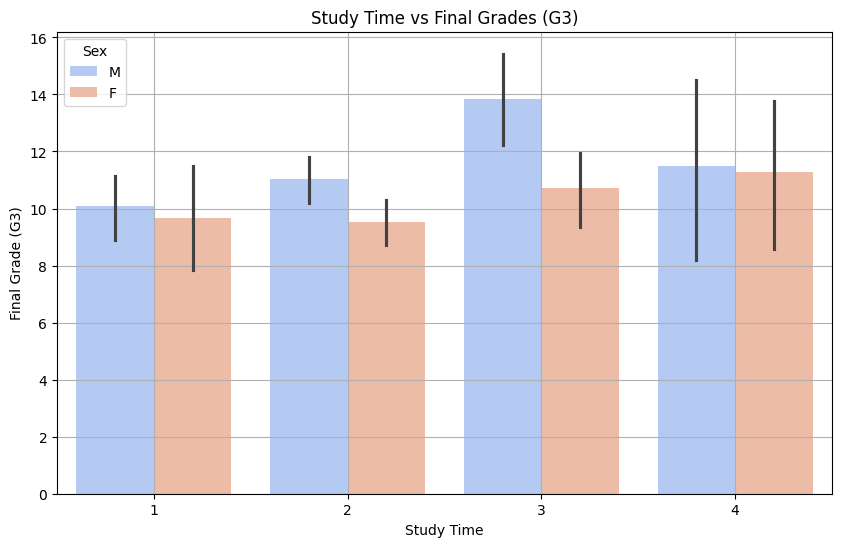

In [13]:
# Plot study time vs final grades (G3)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='studytime', y='G3', hue='sex', palette='coolwarm')
plt.title('Study Time vs Final Grades (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()



- Insight: This barplot identify if more study time correlates with higher final grades and if there are any differences between genders.
- male study hour is more than female

C:\Users\arora\AppData\Local\Temp\ipykernel_14624\1359025314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='famsize', y='G3', palette='pastel')


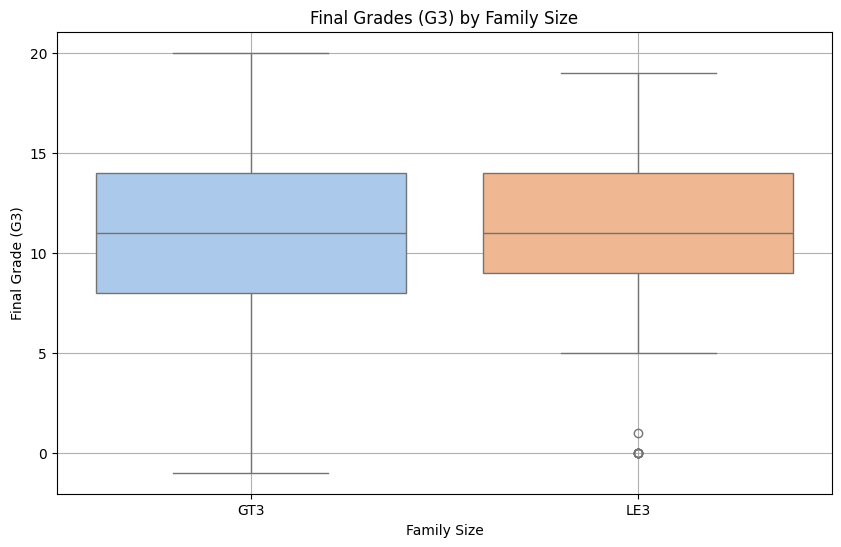

In [14]:
# Plot final grades (G3) by family size (famsize)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='famsize', y='G3', palette='pastel')
plt.title('Final Grades (G3) by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()



- Insight: This box plot shows how family size impacts final grades. Significant differences between family sizes might suggest social factors affecting academic performance.


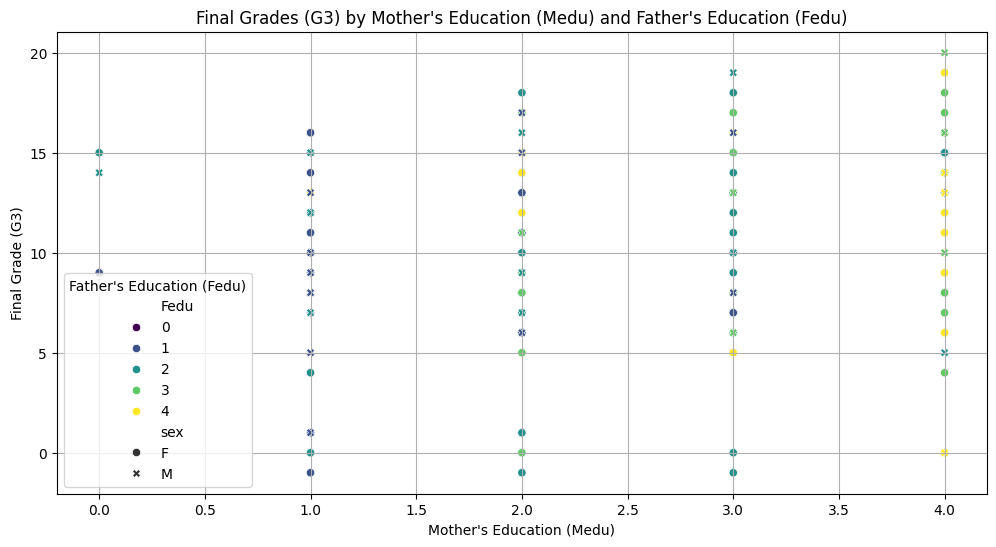

In [19]:
# Plot final grades (G3) by mother's education (Medu) and father's education (Fedu)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Medu', y='G3', hue='Fedu', palette='viridis', style='sex')
plt.title('Final Grades (G3) by Mother\'s Education (Medu) and Father\'s Education (Fedu)')
plt.xlabel('Mother\'s Education (Medu)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Father\'s Education (Fedu)')
plt.grid(True)
plt.show()



- Insight: This scatter plot explores how parental education levels relate to student performance. Differences might highlight the impact of parental involvement or support.


# model using NN


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
# Encode categorical features
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check the data types and ensure no missing values remain
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [22]:
# Define the target and features
X = df.drop('G3', axis=1)  # Features
y = df['G3']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of scaled data
print(f"X_train_scaled {X_train_scaled.shape}, X_test_scaled.shape {X_test_scaled.shape}")


X_train_scaled (316, 36), X_test_scaled.shape (79, 36)


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Mean Squared Error: 5.67
Mean Absolute Error: 1.55
R^2 Score: 0.73


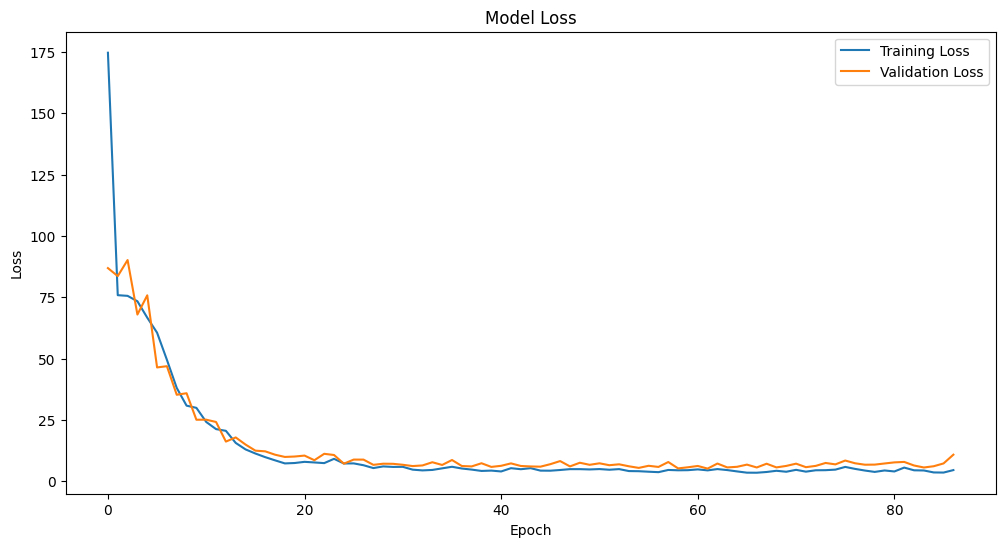

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Your model code here
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(1, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.1)))

# Define a lower learning rate
learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Mean Squared Error: 8.20
R^2 Score: 0.62


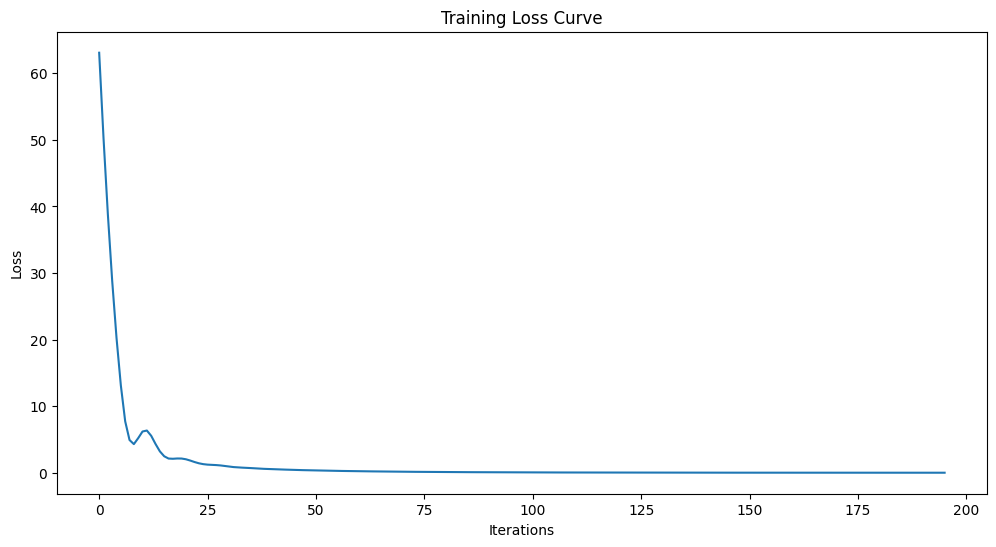

In [90]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Build the MLP model using scikit-learn
mlp = MLPRegressor(hidden_layer_sizes=(100,),  # Three hidden layers: 128, 64, and 32 neurons                 # Activation function for hidden layers
                   solver='adam',                     # Adam optimizer
                   learning_rate_init=0.01,          # Initial learning rate
                   max_iter=1000,                     # Maximum number of iterations
                   random_state=42,)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot loss curve during training (MLPRegressor has a loss_curve_ attribute)
plt.figure(figsize=(12, 6))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


# High r2 score ann


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Mean Squared Error: 5.43
Mean Absolute Error: 1.56
R^2 Score: 0.75


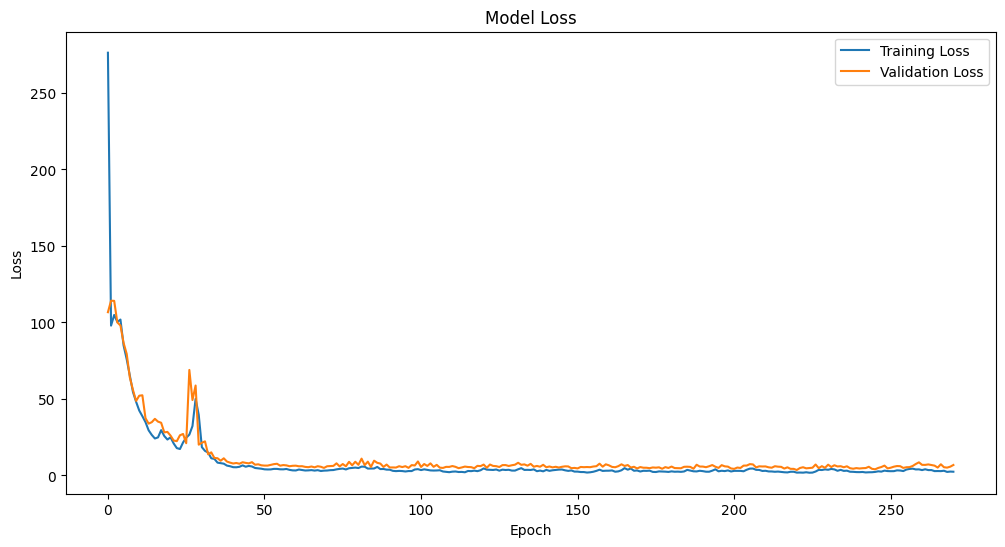

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build the neural network model with adjusted architecture and regularization
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(1, activation='linear'))

# Define a lower learning rate
learning_rate = 0.1  # Smaller learning rate for more stable updates
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new parameters
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define early stopping with patience of 50 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model for more epochs and with a larger batch size
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Mean Squared Error: 7.00
Mean Absolute Error: 1.64
R^2 Score: 0.67


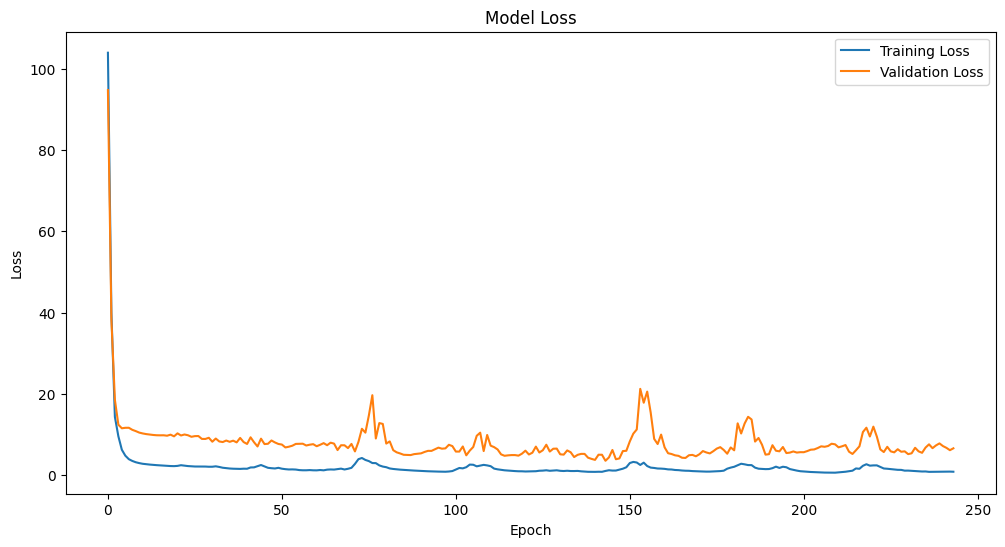

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build the neural network model with adjustments
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))

# Define a lower learning rate
learning_rate = 0.01  # Lower learning rate for more stable updates
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new parameters
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define early stopping with patience of 100 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model for more epochs and with a larger batch size
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
